# Theoric Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_theoric = pd.read_csv("naive_bayes_theoric_dataset.csv" , sep = ";")
df_theoric

,departmant,experience,wage
0,math,1,5000
1,math,2,3000
2,math,2,7000
3,math,5,9500
4,math,5,7100
5,math,7,6400
6,pysh,7,9000
7,pysh,7,13000
8,pysh,8,15000
9,pysh,8,9800


In [3]:
math = df_theoric[df_theoric["departmant"] == "math"]
pysh = df_theoric[df_theoric["departmant"] == "pysh"]

In [4]:
def circle( xy, radius, color="lightsteelblue", facecolor="none", alpha=1, ax=None ):
    """ add a circle to ax= or current axes
    """
        # from .../pylab_examples/ellipse_demo.py
    e = Circle( xy=xy, radius=radius )
    if ax is None:
        ax = pl.gca()  # ax = subplot( 1,1,1 )
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_edgecolor( color )
    e.set_facecolor( facecolor )  # "none" not None
    e.set_alpha( alpha )

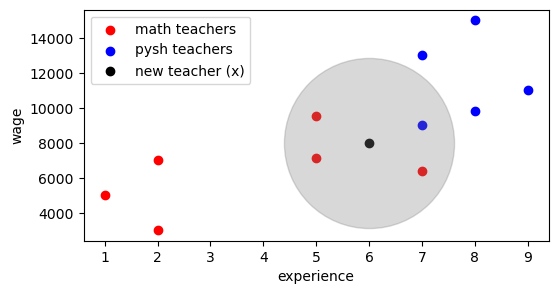

In [4]:
plt.figure(figsize=(6, 3))
plt.scatter(math.experience , math.wage , color = "red", label = "math teachers")
plt.scatter(pysh.experience , pysh.wage , color = "blue", label = "pysh teachers")
plt.scatter( 6 , 8000 , color = "black" , label = "new teacher (x)")
plt.scatter( 6 , 8000 , color = "gray" , s = 15000 , alpha = 0.3)
plt.xlabel("experience")
plt.ylabel("wage")
plt.legend()

plt.show()

# P(math | x) = P(x | math) * P(math) / P(x)
### P(math | x) =  X'e göre math öğretmeni olma ihtimali 
### P(x | math) = Likelihood = Alandaki math'ların, tüm mathlara oranı = 3/6
### P(math) = Prior Probability = math'ların, tüm noktaların toplamına oranı = 6 / 11
### P(x) = Marginal Likelihood = alandaki noktaların, tüm noktaların toplamına oranı = 6 / 11
#
## # P(math | x) = ( (3/6)*(6/11) ) / (4/11)

#

# Practical Part 

In [5]:
df = pd.read_csv("naive_bayes_dataset.csv")
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [6]:
df.drop(["id","Unnamed: 32"] , axis = 1 , inplace = True)
df["diagnosis"] = [1 if each == "M" else 0 for each in df["diagnosis"]]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


# Data visualization

In [8]:
M = df[df["diagnosis"] == 1]
B = df[df["diagnosis"] == 0]

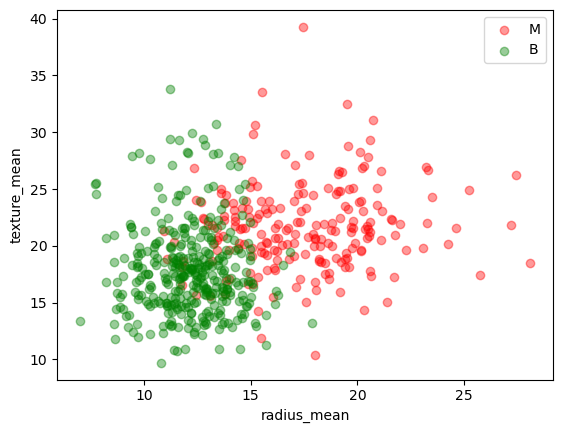

In [9]:
plt.scatter(M["radius_mean"] , M["texture_mean"] , color = "red" , label = "M" , alpha = 0.4)
plt.scatter(B["radius_mean"] , B["texture_mean"] , color = "green" , label = "B" , alpha = 0.4)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

# x-y & normalization

In [12]:
y = df["diagnosis"]
x_data = df.drop(["diagnosis"], axis = 1)
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-test

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train , y_train)

GaussianNB()

# Predict

In [16]:
print("accuracy : ", nb.score(x_test , y_test))

accuracy :  0.935672514619883
